In [25]:
import numpy as np
import matplotlib.pyplot as plt

import random

In [26]:
def generator_function(x):
    return 3.0/2.0*(1.0 - x*x)

In [27]:
random.seed(1)

In [29]:
max_order = 6
min_order = 2
nbins = 20

norders = max_order - min_order + 1
nbin = nbins

npts = np.zeros(norders)
print (np)
enp = np.zeros(norders)
sum2 = np.zeros(norders)
esum2 = np.zeros(norders)
esum3 = np.zeros(norders)
np2 = np.zeros(norders)
np3 = np.zeros(norders)

print (np)

sum = [[0 for x in range(0,nbin)] for y in range(0,norders)]

for j in range(min_order,max_order+1):
    npoints = 10**j
    npts[j-min_order]=npoints
    np2[j-min_order]=1.0/np.sqrt(npoints)
    np3[j-min_order]=np.log(1.0*npoints)

    for k in range(0,nbin):
        xlow = 0.0
        xhigh = 1.0
        dx = (xhigh-xlow)/npoints
        
        for i in range(0,int(npoints)):
            xval = xlow+random.random()*(xhigh-xlow)
            yval = generator_function(xval)
            sum[j-min_order][k] += dx*yval
            
    for k in range(0,nbin):
        sum2[j-min_order] += sum[j-min_order][k]/nbin
        
    for k in range(0,nbin):
        esum2[j-min_order] += (sum[j-min_order][k]-sum2[j-min_order])**2/nbin
    
    esum2[j-min_order]=np.sqrt(esum2[j-min_order])
    print("Integral = %f +/- %f for npoints = %f" %(sum2[j-min_order],esum2[j-min_order],npoints))
    print("Error = %f" %np.abs(1.0-sum2[j-min_order]))
    esum3[j-min_order]=np.log(esum2[j-min_order])
    
    

<module 'numpy' from '/usr/local/lib64/python3.6/site-packages/numpy/__init__.py'>
<module 'numpy' from '/usr/local/lib64/python3.6/site-packages/numpy/__init__.py'>
Integral = 1.005202 +/- 0.067923 for npoints = 100.000000
Error = 0.005202
Integral = 0.996567 +/- 0.014721 for npoints = 1000.000000
Error = 0.003433
Integral = 0.999890 +/- 0.003808 for npoints = 10000.000000
Error = 0.000110
Integral = 1.000049 +/- 0.001642 for npoints = 100000.000000
Error = 0.000049
Integral = 0.999931 +/- 0.000643 for npoints = 1000000.000000
Error = 0.000069


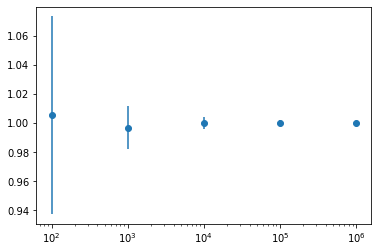

In [34]:
plt.errorbar(npts,sum2,xerr=enp,yerr=esum2,fmt='o')
plt.xscale("log")

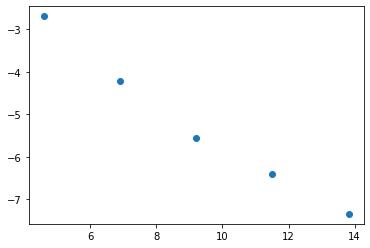

In [36]:
plt.plot(np3,esum3,'o')